# Accuracy of LDA and QDA Classifiers  
-seed used 10 
- **FDA + LDA** → **Train:** 100.00%, **Test:** 89.33%  
- **FDA + QDA** → **Train:** 100.00%, **Test:** 73.67%  
- **PCA (81D) + LDA** → **Train:** 99.67%, **Test:** 97.67%  
- **PCA (49D, 90% variance) + LDA** → **Train:** 98.67%, **Test:** 96.00%  
- **PCA (2D) + LDA** → **Train:** 65.33%, **Test:** 63.00%  

## Effect of PCA on Classification Performance  

- we got 81 dim reducing to 95% variance and 49 while retaining 90% variance and 32% variance in top 2 eigenvector

- Reducing dimensions with **PCA before LDA** improves generalization while retaining most variance.  
- **Higher dimensions (81D, 49D)** maintain accuracy, but **drastic reduction (2D) made it go down in performance**.  
- **FDA improves QDA/LDA performance**, but **QDA struggles more** with test accuracy.  
- **Best performance:** **PCA (49D) + LDA** achieving **96% test accuracy**.  

##

- While applying **FDA**, the **singular matrix eigenvalues were very large**, even with regularization.  
-This affected **QDA performance** significantly.  
- LDA was also impacted, but performed better than QDA.  
- **Dataset Loader:** Used from the **Kaggle dataset**.  
- **Eigenvalue Sorting:** Implemented using insights from **Math Stack Exchange**.  


In [ ]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        
#
# Verify Reading Dataset via MnistDataloader class
#

import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
# input_path = '../input'
# training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
# training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
# test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
# test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# training_images_filepath = r"C:\Users\ujjwal\Desktop\sml\train-images.idx3-ubyte"
# training_labels_filepath = r"C:\Users\ujjwal\Desktop\sml\train-labels.idx1-ubyte"
# test_images_filepath = r"C:\Users\ujjwal\Desktop\sml\t10k-images.idx3-ubyte"
# test_labels_filepath = r"C:\Users\ujjwal\Desktop\sml\t10k-labels.idx1-ubyte"

training_images_filepath = r"train-images.idx3-ubyte"
training_labels_filepath = r"train-labels.idx1-ubyte"
test_images_filepath = r"t10k-images.idx3-ubyte"
test_labels_filepath = r"t10k-labels.idx1-ubyte"



#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(training_images, training_labels), (test_images, test_labels) = mnist_dataloader.load_data()

print(type(training_images))



training_images = np.array(training_images)
test_images = np.array(test_images)
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)


print((training_images.shape))
print(type(training_images))
#this data is not flattened therefore 




import numpy as np

# training_images[0] = np.array(training_images[0])  # Convert list of arrays to a single NumPy array

# print(training_images[0])  # Should print (28, 28)

# plt.imshow(np.array(x_train[-1]), cmap="gray")
# plt.show()

print(f"Training images shape: {training_images.shape}")
print(f"Training labels shape: {training_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")




<class 'list'>
(60000, 28, 28)
<class 'numpy.ndarray'>
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
selected_train = np.isin(training_labels,[0,1,2])
filtered_training_images=training_images[selected_train]
filtered_training_labels=training_labels[selected_train]

selected_test=np.isin(test_labels,[0,1,2])
filtered_test_images=test_images[selected_test]
filtered_test_labels=test_labels[selected_test]

print(filtered_training_images.shape)
print(filtered_training_labels.shape)


print(np.unique(training_labels))  
print(np.isin(training_labels, [0,1,2]))  
print(np.sum(np.isin(training_labels, [0,1,2])))  







(18623, 28, 28)
(18623,)
[0 1 2 3 4 5 6 7 8 9]
[False  True False ... False False False]
18623


In [ ]:
np.random.seed(10)

train_images=[]
train_labels=[]

test_images=[]
test_labels=[]

for c in [0,1,2]:
    index_train=np.where(np.array(filtered_training_labels)==c)[0]
    index_test=np.where(np.array(filtered_test_labels)==c)[0]

    sample_train=np.random.choice(index_train,100,replace=False)
    sample_test=np.random.choice(index_test,100,replace=False)

    train_images.append(filtered_training_images[sample_train])
    train_labels.append(filtered_training_labels[sample_train])

    test_images.append(filtered_test_images[sample_test])
    test_labels.append(filtered_test_labels[sample_test])

train_images = np.concatenate(train_images,axis=0)
train_label  = np.concatenate(train_labels,axis=0)

test_images=np.concatenate(test_images,axis=0)
test_labels=np.concatenate(test_labels,axis=0)

print("train set shape:", train_images.shape)  # Should be (300, 28, 28)
print("test set shape:", test_images.shape) 

print("labels in train set:", np.unique(train_label))
print("labels in test set:", np.unique(test_labels))


train set shape: (300, 28, 28)
test set shape: (300, 28, 28)
labels in train set: [0 1 2]
labels in test set: [0 1 2]


In [ ]:
# we will now convert them into feature vectors and normalize them 

training_set=train_images.reshape(train_images.shape[0],-1)
test_set=test_images.reshape(test_images.shape[0],-1)


training_set=training_set.astype(np.float32)/255.0
test_set=test_set.astype(np.float32)/255.0


print(training_set.shape)
print(test_set.shape)

print(type(training_set[0][0]))

print("Min:", np.min(training_set), "Max:", np.max(training_set))

print(training_set[56])



(300, 784)
(300, 784)
<class 'numpy.float32'>
Min: 0.0 Max: 1.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

In [ ]:
print(training_set.shape)


def compute_mean(data, way):
    total_samples = data.shape[0]
    total_features = data.shape[1]
    
    if way == 0:
        meanvector = np.zeros(total_features)
        for i in range(total_samples):
            meanvector += data[i]
        return meanvector / total_samples
    
    elif way == 1:
        meanvector = np.zeros(total_samples)
        for j in range(total_features):
            meanvector += data[:, j]
        return meanvector / total_features



def compute_cov(data):
    #covaraince matrix is 1/n * sum of (x-mean).T @ (x-mean)
    #its gonna be 300x784 x 784x300==> 784x784

    total_sample = data.shape[0]
    # totalmean= compute_mean(data)
    totalmean = compute_mean(data,0)
    totalmean=totalmean.reshape(1, -1)
    centered_matrix = data-totalmean

    cov = centered_matrix.T @ centered_matrix
    cov=cov / total_sample
    # print("covariance matrix shape ",cov.shape)
    # np.savetxt("covariance_matrix.txt", cov)

    return cov

covar = compute_cov(training_set)


    

(300, 784)


In [ ]:

if np.allclose(covar, covar.T):
    print("symm")
else:
    print("non symm")


if np.all(np.diag(covar)>=0):
    print("fine ")
else:
    print("false")    

cov_matrix_numpy = np.cov(training_set, rowvar=False, bias=True)  # bias=True -> divide by N
if np.allclose(covar, cov_matrix_numpy):
    print("same ")
else:
    print("difference")


computed_mean=compute_mean(training_set,0)
numpy_mean = np.mean(training_set, axis=0)

print("Difference in means:", np.max(np.abs(computed_mean - numpy_mean)))

print("Max difference:", np.max(np.abs(covar - cov_matrix_numpy)))
    
#MEAN and COV NEED 300,784 for proper output 


symm
fine 
same 
Difference in means: 2.529673899243079e-07
Max difference: 2.7755575615628914e-17


In [ ]:
def compute_MLE(images,labels):
    class_means={}
    class_cov={}

    for c in [0,1,2]:
        indexs=np.where(labels==c)[0]
        sample = images[indexs]
        print(f"Class {c} shape: {sample.shape}") 

        mean=compute_mean(sample,0) 
        print(f"Class {c} mean_shape: {mean.shape}") 

        cov=compute_cov(sample)

        class_means[c]=mean
        class_cov[c]=cov

    return class_means,class_cov

current_MLE_mean,current_MLE_cov=compute_MLE(training_set,train_label)

MEANFORCLASS0 = current_MLE_mean[0]
MEANFORCLASS1 = current_MLE_mean[1]
MEANFORCLASS2 = current_MLE_mean[2]



Class 0 shape: (100, 784)
Class 0 mean_shape: (784,)
Class 1 shape: (100, 784)
Class 1 mean_shape: (784,)
Class 2 shape: (100, 784)
Class 2 mean_shape: (784,)


In [ ]:
current_MLE_mean[0].shape


(784,)

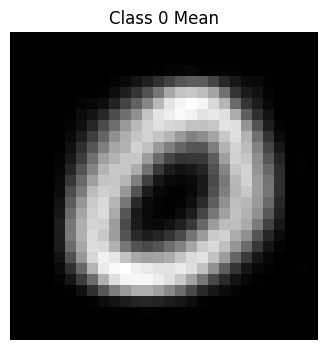

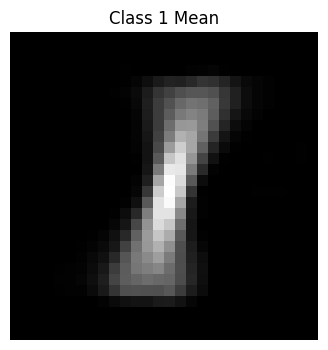

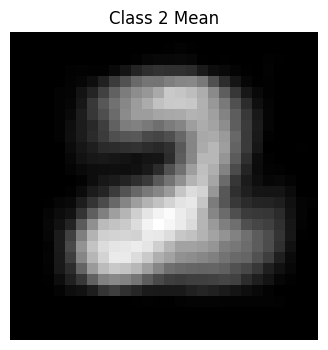

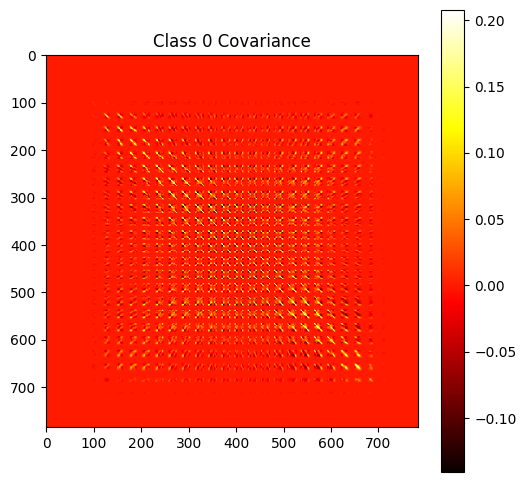

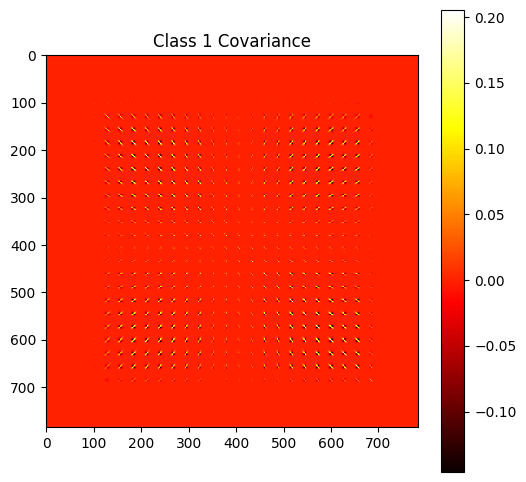

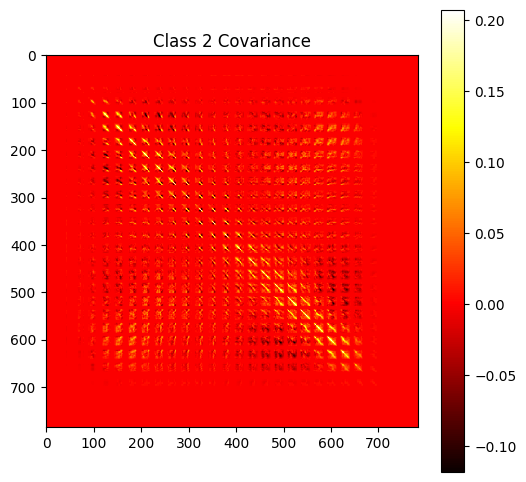

In [ ]:
for c in [0, 1, 2]:
    plt.figure(figsize=(4, 4))
    plt.imshow(current_MLE_mean[c].reshape(28, 28), cmap="gray")
    plt.title(f"Class {c} Mean")
    plt.axis("off")
    plt.show()

for c in [0, 1, 2]:
    plt.figure(figsize=(6, 6))
    plt.imshow(current_MLE_cov[c], cmap="hot", interpolation="nearest")
    plt.title(f"Class {c} Covariance")
    plt.colorbar()
    plt.show()



In [ ]:
# ####PCA using numpy 

# import numpy as np


# print("Current dataset shape:", training_set.shape)


# X = training_set.T
# print("New dataset shape:", X.shape)

# mu = np.mean(X, axis=1, keepdims=True) 

# Xc = X - mu  # Center the data
# # print("Centered data shape:", Xc.shape)

# # # Compute the covariance matrix
# S = (Xc @ Xc.T) / (X.shape[1] - 1)  # Covariance matrix


# eigval, eigvec = np.linalg.eigh(S)  # Use eigh for symmetric matrices

# # Sort eigenvalues and eigenvectors in descending order
# idx = eigval.argsort()[::-1]  # Sort in descending order
# eigval = eigval[idx]
# eigvec = eigvec[:, idx]

# # Check eigenvalues and eigenvectors
# # print("Eigenvalues:", eigval)
# print("Eigenvectors shape:", eigvec.shape)
# np.savetxt("numpyone.txt",eigvec)



In [ ]:
# we will apply PCA now 

print("current data set ",training_set.shape)

#hence 

X=training_set.T

print("new data set",X.shape)

mu = compute_mean(X,1)
mu=mu.reshape(-1,1)

Xc=X-mu
print(Xc.shape)

# S = (Xc @ Xc.T) / (X.shape[1] - 1) 

S=(Xc @ Xc.T)/(299)

eigval,eigvec=np.linalg.eigh(S)

idx = eigval.argsort()[::-1]
evalue = eigval[idx]
evector = eigvec[:, idx]


# np.savetxt("myone.txt",evector)



current data set  (300, 784)
new data set (784, 300)
(784, 300)


In [ ]:
# print(evalue)
print(max(evalue))
print(min(evalue))


12.807448816445815
-1.2940710246774793e-15


In [ ]:
#reducing dimensions 
def cumulative_variance(evalue):
    total = sum(evalue)  # Compute the total sum of eigenvalues
    cumsum = []          # List to store cumulative sum
    running_sum = 0      # Variable to keep track of the running sum

    for val in evalue:
        running_sum += val
        cumsum.append(running_sum / total)  # Compute cumulative variance
    
    return np.array(cumsum)


result = cumulative_variance(evalue)
print(len(result))  # Should print cumulative variance

p = np.argmax(result >= 0.95) + 1

print(p)
# cumulativevariance = np.cumsum(evalue) / np.sum(evalue)
# print(cumulativevariance)


784
81


In [ ]:
Up = evector[:, :p]
print(Up.shape)


(784, 81)


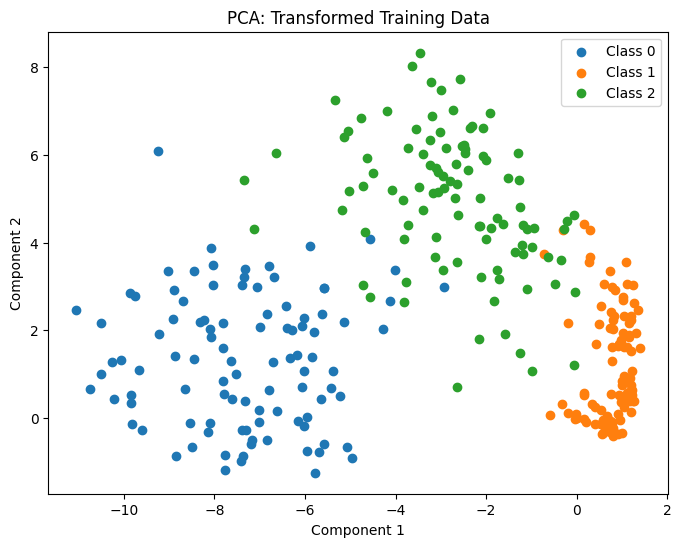

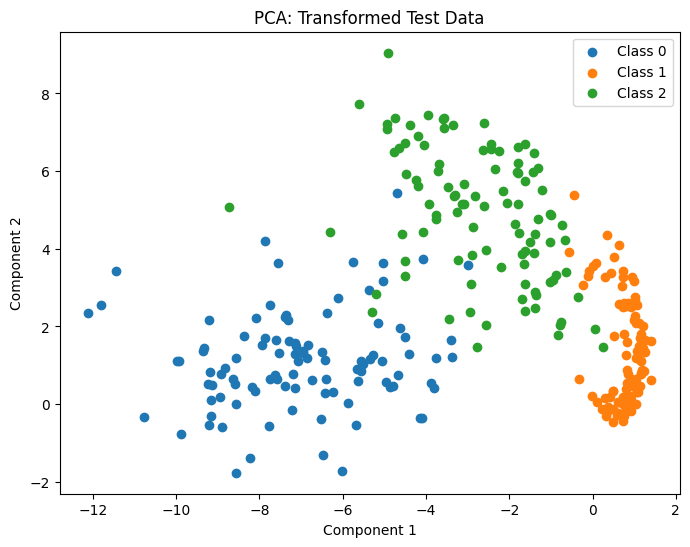

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_pca_train = training_set @ Up
X_pca_test = test_set @ Up

plt.figure(figsize=(8, 6))
for c in np.unique(train_label):
    plt.scatter(X_pca_train[train_label == c, 0], X_pca_train[train_label == c, 1], label=f'Class {c}')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Transformed Training Data')
plt.show()

plt.figure(figsize=(8, 6))
for c in np.unique(test_labels):
    plt.scatter(X_pca_test[test_labels == c, 0], X_pca_test[test_labels == c, 1], label=f'Class {c}')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Transformed Test Data')
plt.show()


In [ ]:
training_set.shape

(300, 784)

In [ ]:
#FDA
import scipy

def compute_in_scatter(training_set,training_labels):
    total_classes=np.unique(training_labels)
    total_features=training_set.shape[1] #(784 right)
    total_samples=training_set.shape[0]

    #????
    #calculate mean across column vectors ig 
    total_class_mean=compute_mean(training_set,0)
    total_class_mean=total_class_mean.reshape(total_features,1)

    #both sb and sw have dim 784x784

    Sb=np.zeros((total_features,total_features))
    Sw=np.zeros((total_features,total_features))

    for w in total_classes:
        W_C=training_set[training_labels==w]
        W_N=W_C.shape[0]#ig num of samples 

        mean_W = compute_mean(W_C,0) 
        mean_W=mean_W.reshape(total_features,1)

        #calculating between scatter matrix 
        #sum of Ni * (centered mean - class mean )* (centered mean - class mean )T

        difference = mean_W-total_class_mean
        outer_product = difference @ difference.T
        Sb+=W_N*outer_product

        #calculating within class scatter matrix 
        #compute the class mean_W and then for each val in class W 
        #(val - mean_w)*(val-mean_w)T

        # for val in W_C:
        #     print(val.shape)

        for val in W_C:
            val=val.reshape(total_features,1)
            diff= val-mean_W
            product = diff @ diff.T
            Sw+=product



    return Sw,Sb

Sw,Sb = compute_in_scatter(training_set,train_label)


In [ ]:
#we check if sw is PSD
print(np.all(np.linalg.eigvalsh(Sw) >= 0))


False


In [ ]:
#checking Sw 
# Add small epsilon to the diagonal to make it PSD 
Sw += np.eye(Sw.shape[0]) * 1e-2 


print(np.all(np.linalg.eigvalsh(Sw) >= 0))

eigvals, eigvecs = np.linalg.eigh(Sw) 


True


In [ ]:
#we will now project this 

gen_eigenvals, gen_eigenvecs = scipy.linalg.eigh(Sb,Sw)

idx = np.argsort(gen_eigenvals)[::-1]
eigenvecs = gen_eigenvecs[:, idx]
W = eigenvecs[:, :2] 

print(W.shape)

(784, 2)


In [ ]:
print(W.shape)

(784, 2)


In [ ]:
def LDA_classifier(X, mean, cov):
    inv_cov = np.linalg.inv(cov)
    return (mean.T @ inv_cov @ X) - 0.5 * (mean.T @ inv_cov @ mean)


def QDA_classifier(X, mean, cov):
    inv_cov = np.linalg.inv(cov)
    return -0.5 * np.log(np.linalg.det(cov)) - 0.5 * (X - mean).T @ inv_cov @ (X - mean) 


In [ ]:
X_train_Projected = training_set @ W
X_Test_Projected = test_set @ W

import numpy as np


def predict_LDA(X, class_means, cov):
    predictions = []
    for x in X:
        scores = []
        for mean in class_means:
            score = LDA_classifier(x, mean, cov)
            scores.append(score)
        predictions.append(np.argmax(scores))  
    return np.array(predictions)


def c_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

classes = np.unique(train_label)
class_means = []
for c in classes:
    class_data = X_train_Projected[train_label == c]
    class_mean = compute_mean(class_data, way=0)
    class_means.append(class_mean)
class_means = np.array(class_means)

cov = compute_cov(X_train_Projected)

# we now predict for training and test sets
y_train_pred = predict_LDA(X_train_Projected, class_means, cov)
y_test_pred = predict_LDA(X_Test_Projected, class_means, cov)

#these will be the final accuracy 
train_accuracy = c_accuracy(train_label, y_train_pred)
test_accuracy = c_accuracy(test_labels, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Training Accuracy: 100.00%
Test Accuracy: 89.33%


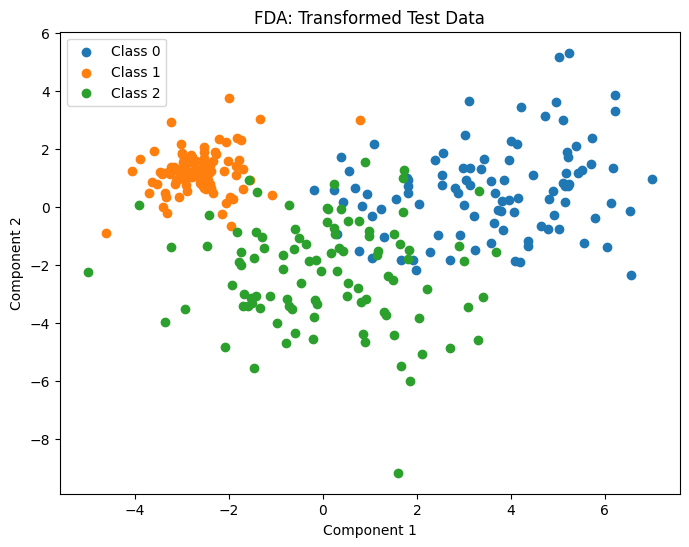

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.figure(figsize=(8, 6))
# for c in np.unique(train_label):
#     plt.scatter(X_train_Projected[train_label == c, 0], X_train_Projected[train_label == c, 1], label=f'Class {c}')

# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.legend()
# plt.title('FDA: Transformed Training Data')
# plt.show()

plt.figure(figsize=(8, 6))
for c in np.unique(test_labels):
    plt.scatter(X_Test_Projected[test_labels == c, 0], X_Test_Projected[test_labels == c, 1], label=f'Class {c}')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('FDA: Transformed Test Data')
plt.show()


In [ ]:
# Compute class-specific means and covariance matrices for the quadratic one 
classes = np.unique(train_label)
class_means = []
class_covs = []
class_priors = []

for c in classes:
    class_data = X_train_Projected[train_label == c]
    class_mean = compute_mean(class_data, way=0)  
    class_cov = compute_cov(class_data)  
    class_prior = len(class_data) / len(X_train_Projected)  
    
    class_means.append(class_mean)
    class_covs.append(class_cov)
    class_priors.append(class_prior)

class_means = np.array(class_means)
class_covs = np.array(class_covs)
class_priors = np.array(class_priors)

def predict_QDA(X, class_means, class_covs):
    predictions = []
    for x in X:
        scores = []
        for i in range(len(class_means)):
            score = QDA_classifier(x, class_means[i], class_covs[i])
            scores.append(score)
        predictions.append(np.argmax(scores))  
    return np.array(predictions)


y_train_pred_qda = predict_QDA(X_train_Projected, class_means, class_covs)
y_test_pred_qda = predict_QDA(X_Test_Projected, class_means, class_covs)


train_accuracy_qda = c_accuracy(train_label, y_train_pred_qda)
test_accuracy_qda = c_accuracy(train_label, y_test_pred_qda)

print(f"QDA Training Accuracy: {train_accuracy_qda * 100:.2f}%")
print(f"QDA Test Accuracy: {test_accuracy_qda * 100:.2f}%")

QDA Training Accuracy: 100.00%
QDA Test Accuracy: 73.67%


In [ ]:
np.savetxt("Up.txt",Up)

In [ ]:
# Compute pooled covariance and means in PCA subspace

projected_covs = {c: Up.T @ current_MLE_cov[c] @ Up for c in [0, 1, 2]}

projected_means = {c: Up.T @ current_MLE_mean[c] for c in [0, 1, 2]}


pooled_cov = sum(projected_covs.values()) / len(projected_covs)  

Xc = training_set.T - mu


X_test = test_set.T - mu


Y_train = Up.T @ Xc
Y_test = Up.T @ X_test

scores = np.array([
    LDA_classifier(Y_test, projected_means[i], pooled_cov) for i in range(3)
])  


predicted_labels = np.argmax(scores, axis=0)


train_predictions = np.argmax([
    LDA_classifier(Y_train, projected_means[i], pooled_cov) for i in range(3)
], axis=0)

train_accuracy = np.mean(train_predictions == train_label)
test_accuracy = np.mean(predicted_labels == test_labels)

print(f"Training Accuracy: {train_accuracy*100:.4f}%")
print(f"Test Accuracy: {test_accuracy*100:.4f}%")


Training Accuracy: 99.6667%
Test Accuracy: 97.6667%


In [ ]:
print("Unique values in test_labels:", np.unique(test_labels))


Unique values in test_labels: [0 1 2]


In [ ]:
import numpy as np

# we find newdim such that var is 90% 
newdim = np.argmax(result >= 0.90) + 1
print("New dimension for 90% variance:", newdim)

# Select the first "newdim" eigenvectors
U_newdim = evector[:, :newdim]
print("Shape of U_newdim:", U_newdim.shape)


Xc = training_set.T - mu

X_test = test_set.T - mu


Y_train_95 = U_newdim.T @ Xc
Y_test_95 = U_newdim.T @ X_test

projected_means_95 = {c: U_newdim.T @ current_MLE_mean[c] for c in [0, 1, 2]}

projected_covs_95 = {c: U_newdim.T @ current_MLE_cov[c] @ U_newdim for c in [0, 1, 2]}
pooled_cov_95 = sum(projected_covs_95.values()) / len(projected_covs_95)

scores_95 = np.array([
    LDA_classifier(Y_test_95, projected_means_95[i], pooled_cov_95) for i in range(3)
])  

predicted_labels_95 = np.argmax(scores_95, axis=0)

train_predictions_95 = np.argmax([
    LDA_classifier(Y_train_95, projected_means_95[i], pooled_cov_95) for i in range(3)
], axis=0)

train_accuracy_95 = np.mean(train_predictions_95 == train_label)
test_accuracy_95 = np.mean(predicted_labels_95 == test_labels)

# Print results
print(f"Training Accuracy (90% variance): {train_accuracy_95*100:.4f}%")
print(f"Test Accuracy (90% variance): {test_accuracy_95*100:.4f}%")


New dimension for 90% variance: 49
Shape of U_newdim: (784, 49)
Training Accuracy (90% variance): 98.6667%
Test Accuracy (90% variance): 96.0000%


In [ ]:
import numpy as np

# Select only the first two principal components
U_2D = evector[:, :2]
print("Shape of U_2D:", U_2D.shape)


Xc = training_set.T - mu
X_test = test_set.T - mu

Y_train_2D = U_2D.T @ Xc
Y_test_2D = U_2D.T @ X_test

projected_means_2D = {c: U_2D.T @ current_MLE_mean[c] for c in [0, 1, 2]}

projected_covs_2D = {c: U_2D.T @ current_MLE_cov[c] @ U_2D for c in [0, 1, 2]}
pooled_cov_2D = sum(projected_covs_2D.values()) / len(projected_covs_2D)

scores_2D = np.array([
    LDA_classifier(Y_test_2D, projected_means_2D[i], pooled_cov_2D) for i in range(3)
])

predicted_labels_2D = np.argmax(scores_2D, axis=0)


train_predictions_2D = np.argmax([
    LDA_classifier(Y_train_2D, projected_means_2D[i], pooled_cov_2D) for i in range(3)
], axis=0)

train_accuracy_2D = np.mean(train_predictions_2D == train_label)
test_accuracy_2D = np.mean(predicted_labels_2D == test_labels)


print(f"Training Accuracy (2D PCA): {train_accuracy_2D*100:.4f}%")
print(f"Test Accuracy (2D PCA): {test_accuracy_2D*100:.4f}%")


Shape of U_2D: (784, 2)
Training Accuracy (2D PCA): 65.3333%
Test Accuracy (2D PCA): 63.0000%


In [ ]:

explained_variance_ratio = evalue / np.sum(evalue)
cumulative_variance = np.cumsum(explained_variance_ratio)
variance_2D = cumulative_variance[1] 
print(f"Variance : {variance_2D*100:.4f}%")


Variance : 32.5004%
